In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append('../tools')
import clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # shut up, seaborn
plt.style.use('./nice.mplstyle')
lc = 0
scan_bf = pd.read_csv(f'../data/fits/testrun/lightcone{lc}/scan_best_fit_LX-T_θ75.csv')
scan_bf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Glon,Glat,A,B,TotalScatter,n_sigma,sigma
0,-180.0,-90.0,1.505036,2.452,0.075,0.000000,0.000000
1,-180.0,-88.0,1.505036,2.452,0.075,-0.917150,0.045975
2,-180.0,-86.0,1.505036,2.452,0.075,-0.764386,0.041229
3,-180.0,-84.0,1.505036,2.455,0.075,-0.666067,0.047315
4,-180.0,-82.0,1.505036,2.455,0.075,-0.666067,0.047315
...,...,...,...,...,...,...,...
8095,176.0,80.0,1.547202,2.455,0.095,1.150789,0.036641
8096,176.0,82.0,1.547202,2.452,0.095,0.991869,0.042511
8097,176.0,84.0,1.547202,2.449,0.095,0.991869,0.042511
8098,176.0,86.0,1.547202,2.449,0.095,0.917150,0.045975


In [5]:
idmax = scan_bf['n_sigma'].idxmax()
idmin = scan_bf['n_sigma'].idxmin()
print(idmax, idmin)

859 4901


In [6]:
print(scan_bf.iloc[idmax])
print(scan_bf.iloc[idmin])

Glon           -144.000000
Glat              8.000000
A                 1.579599
B                 2.515000
TotalScatter      0.070000
n_sigma           2.185889
sigma             0.062065
Name: 859, dtype: float64
Glon            36.000000
Glat            -8.000000
A                1.443933
B                2.284000
TotalScatter     0.075000
n_sigma         -2.185889
sigma            0.062065
Name: 4901, dtype: float64


In [12]:
samples = pd.read_csv('../data/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')

dipolelon = scan_bf.iloc[idmax]['Glon']
dipolelat = scan_bf.iloc[idmax]['Glat']
print(dipolelon, dipolelat)
dtheta = cf.angular_separation(samples['phi_on_lc'].values, 
                               samples['theta_on_lc'].values, 
                               dipolelon, dipolelat)

-144.0 8.0


In [13]:
p_dipoles = samples[:313][dtheta[:313] < 75]
n_dipoles = samples[:313][dtheta[:313] > 105]

# 1 Check histogram of some properties
T, z, fraction, flux

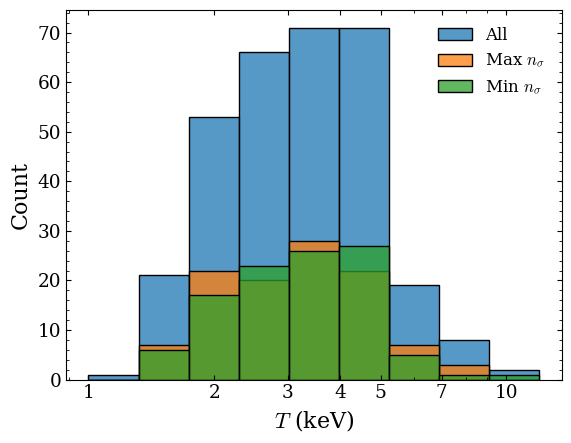

In [14]:
bins = np.linspace(np.log10(1), np.log10(12), 10)
sns.histplot(samples[cf.COLUMNS['T']][:313], bins=bins, label='All', log_scale=True)
sns.histplot(p_dipoles[cf.COLUMNS['T']], bins=bins, label='Max $n_\\sigma$', log_scale=True)
sns.histplot(n_dipoles[cf.COLUMNS['T']], bins=bins, label='Min $n_\\sigma$', log_scale=True)
plt.xlabel('$T$ (keV)')
plt.xticks(ticks=[1, 2, 3, 4, 5, 7, 10],
    labels=['1','2','3','4','5','7','10'])
plt.legend()
plt.show()

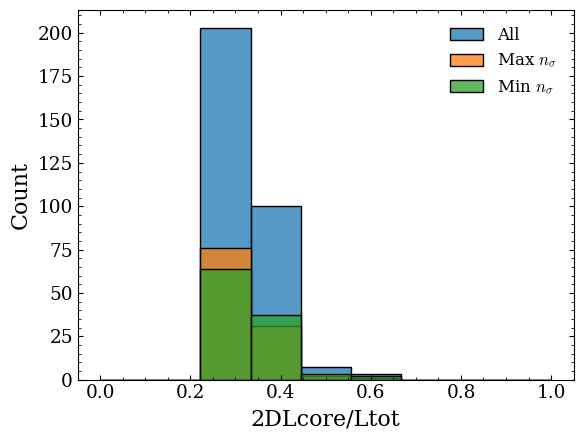

In [16]:
bins = np.linspace(0, 1, 10)
sns.histplot(samples['2DLcore/Ltot'][:313], bins=bins, label='All')
sns.histplot(p_dipoles['2DLcore/Ltot'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['2DLcore/Ltot'], bins=bins, label='Min $n_\\sigma$')
plt.legend()
plt.show()

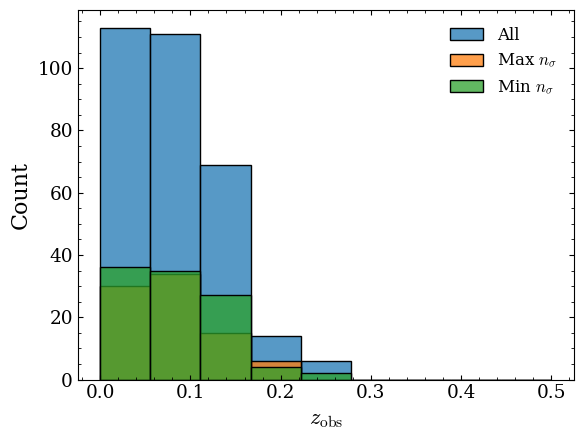

In [8]:
bins = np.linspace(0, 0.5, 10)
sns.histplot(samples['ObservedRedshift'][:313], bins=bins, label='All')
sns.histplot(p_dipoles['ObservedRedshift'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['ObservedRedshift'], bins=bins, label='Min $n_\\sigma$')
plt.xlabel('$z_\\mathrm{{obs}}$')
plt.legend()
plt.show()

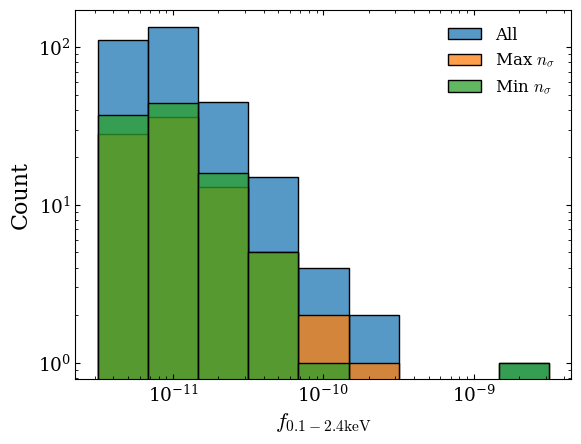

In [9]:
bins = np.linspace(-11.5, -8.5, 10)
sns.histplot(samples['Flux'][:313], bins=bins, label='All', log_scale=[True, True])
sns.histplot(p_dipoles['Flux'], bins=bins, label='Max $n_\\sigma$', log_scale=[True, True])
sns.histplot(n_dipoles['Flux'], bins=bins, label='Min $n_\\sigma$', log_scale=[True, True])
plt.xlabel('$f_{{0.1-2.4\\mathrm{{keV}}}}$')
plt.legend()
plt.show()

# 2 Plot the scaling relations

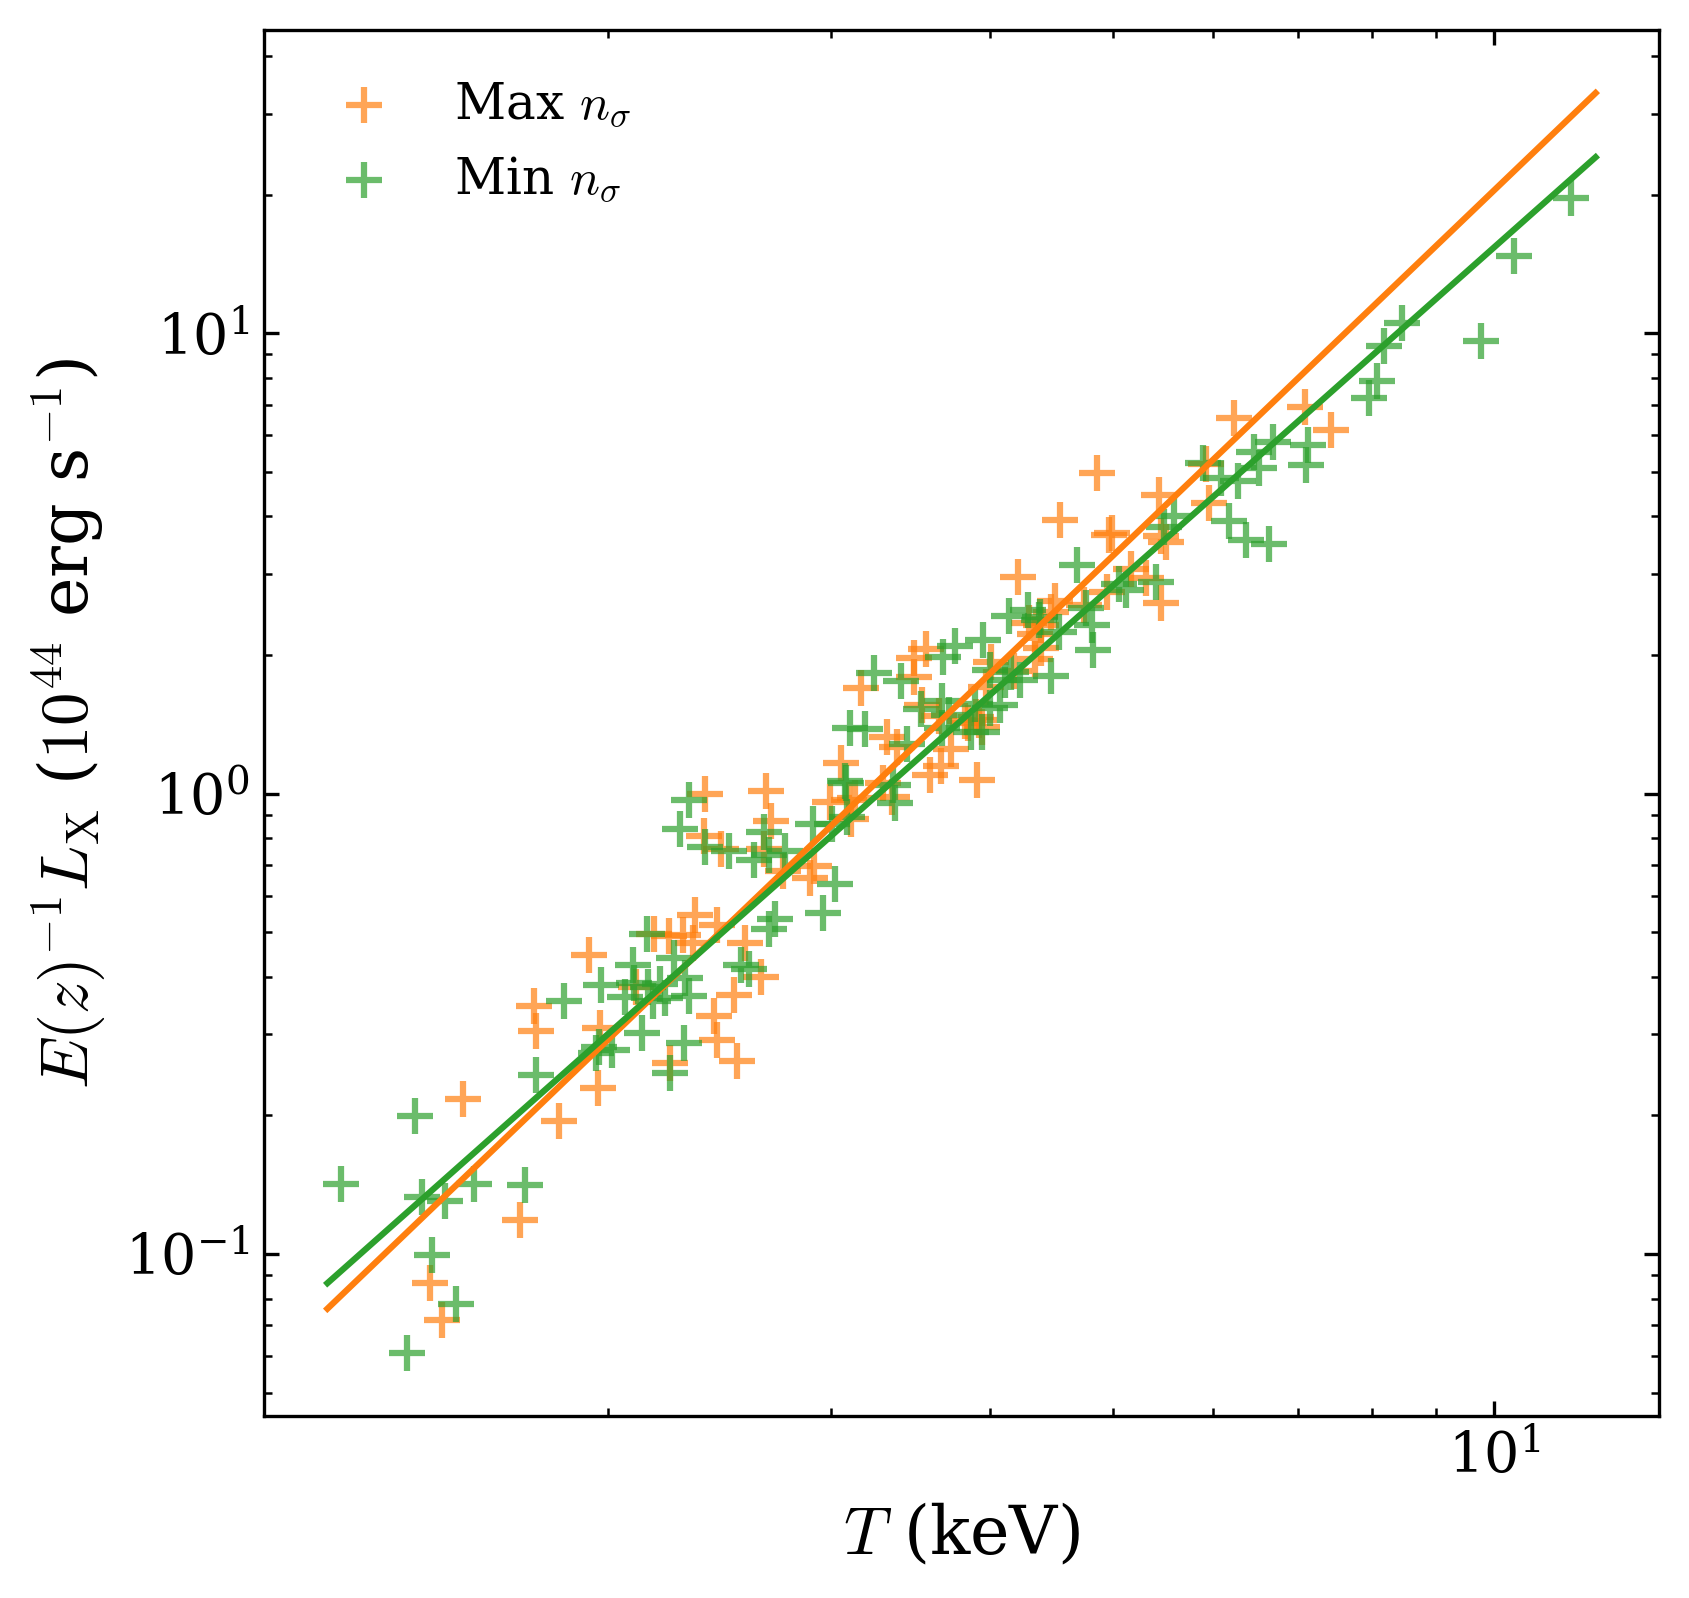

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

CX = 3.8
CY = 1e44
gamma = -1

all_logX_ = np.log10(samples[cf.COLUMNS['T']][:313] / CX)
p_dipoles_logX_ = np.log10(p_dipoles[cf.COLUMNS['T']] / CX)
n_dipoles_logX_ = np.log10(n_dipoles[cf.COLUMNS['T']] / CX)
Ez = cf.E(samples['ObservedRedshift'][:313])
all_logY_ = np.log10(samples[cf.COLUMNS['LX']][:313] / CY * Ez**gamma)
Ez = cf.E(p_dipoles['ObservedRedshift'])
p_dipoles_logY_ = np.log10(p_dipoles[cf.COLUMNS['LX']] / CY * Ez**gamma)
Ez = cf.E(n_dipoles['ObservedRedshift'])
n_dipoles_logY_ = np.log10(n_dipoles[cf.COLUMNS['LX']] / CY * Ez**gamma)

# inverse_weight = np.cos(np.deg2rad(dtheta[:313][dtheta[:313] < 75]))

plt.scatter(10**p_dipoles_logX_*CX, 10**p_dipoles_logY_, alpha=0.7, s=75, marker='+', label='Max $n_\\sigma$', color='tab:orange')
plt.scatter(10**n_dipoles_logX_*CX, 10**n_dipoles_logY_, alpha=0.7, s=75, marker='+', label='Min $n_\\sigma$', color='tab:green')

# # Ugly hack to plot clusters not in the dipoles
# pair1 = np.column_stack((all_logX_, all_logY_))
# pair2 = np.column_stack((p_dipoles_logX_, p_dipoles_logY_))
# pair3 = np.column_stack((n_dipoles_logX_, n_dipoles_logY_))
# else_mask = np.array([pair not in pair2 for pair in pair1]) * np.array([pair not in pair3 for pair in pair1])
# plt.scatter(10**all_logX_[else_mask], 10**all_logY_[else_mask], alpha=0.7, s=7, label='Others')

# plt.errorbar(10**p_dipoles_logX_, 10**p_dipoles_logY_, yerr=inverse_weight*0.09, fmt='.')

logT_ = np.linspace(-0.5, 0.5, 100)
logLX_1 = np.log10(scan_bf['A'][2671]) + scan_bf['B'][2671] * logT_
plt.plot(10**logT_*CX, 10**logLX_1, color='tab:orange')

logLX_2 = np.log10(scan_bf['A'][6689]) + scan_bf['B'][6689] * logT_
plt.plot(10**logT_*CX, 10**logLX_2, color='tab:green')

# logLX_ = 0.033 + 2.756 * logT_
# plt.plot(10**logT_, 10**logLX_, color='k', label='All')

plt.ylabel(f'$E(z)^{{-1}}L_\\mathrm{{X}}$ ($10^{{44}}$ erg s$^{{-1}}$)')
plt.xlabel(f'$T$ (keV)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# The A and B distribution

In [31]:
scan_bt = pd.read_csv('./data/fits/scan_btstrp_LX-T_θ75.csv')
p_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == -64) & (scan_bt['Glat'] == 32)]
n_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == 116) & (scan_bt['Glat'] == -32)]

In [32]:
all_bt = pd.read_csv('./data/fits/bootstrap_LX-T.csv')

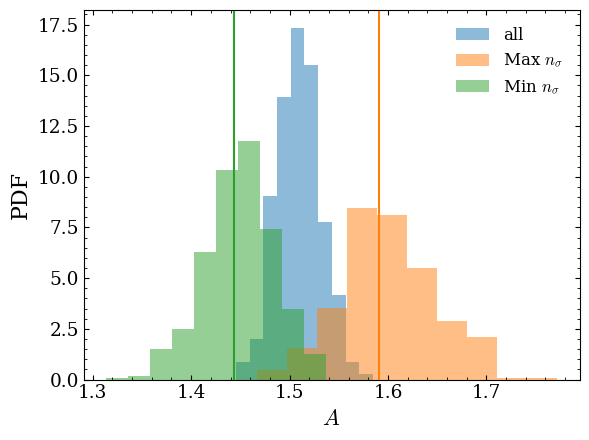

In [33]:
plt.hist(all_bt['A'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['A'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['A'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['A'][2671], color='tab:orange')
plt.axvline(scan_bf['A'][6689], color='tab:green')
plt.xlabel('$A$')
plt.ylabel('PDF')
plt.legend()
plt.show()

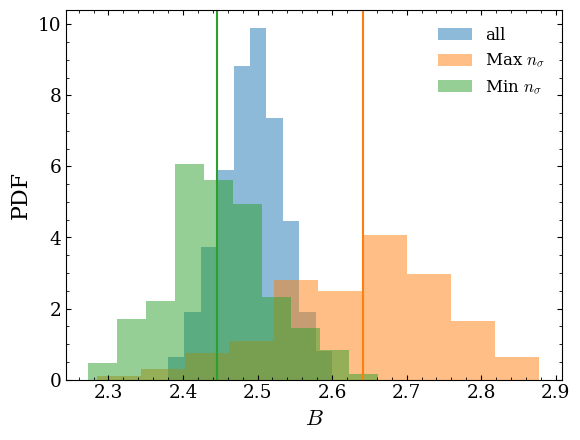

In [34]:
plt.hist(all_bt['B'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['B'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['B'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['B'][2671], color='tab:orange')
plt.axvline(scan_bf['B'][6689], color='tab:green')
plt.xlabel('$B$')
plt.ylabel('PDF')
plt.legend()
plt.show()